<a href="https://colab.research.google.com/github/zzeo0/python/blob/main/Air%20pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import requests
import json
import pandas as pd
from pandas import json_normalize

url = 'http://apis.data.go.kr/B552584/ArpltnStatsSvc/getMsrstnAcctoRDyrg'
params ={'serviceKey' : 'bAFQrKm0mQEL7aIfnl+HyY3a+9K/Kws2zCl3zV9QF72p+XZt+2AsLMwo5EMRStk9BlHQkQW0BsR/NA9Un5siuQ==', 'returnType' : 'JSON', 'numOfRows' : '100', 'pageNo' : '1', 'inqBginDt' : '20230101', 'inqEndDt' : '20230603', 'msrstnName' : '강남구' }

response = requests.get(url, params=params)
print(response.content)


json_file = json.loads(response.text)

df = json_normalize(json_file['response']['body']['items'])
print(df)

df.to_excel("Air pollution.xlsx")

b'{"response":{"body":{"totalCount":141,"items":[{"msurDt":"2023-01-01","so2Value":".0038","coValue":".6","msrstnName":"\xea\xb0\x95\xeb\x82\xa8\xea\xb5\xac","pm10Value":"52","no2Value":".0239","o3Value":".024","pm25Value":"36"},{"msurDt":"2023-01-02","so2Value":".0034","coValue":".4","msrstnName":"\xea\xb0\x95\xeb\x82\xa8\xea\xb5\xac","pm10Value":"24","no2Value":".0206","o3Value":".021","pm25Value":"11"},{"msurDt":"2023-01-03","so2Value":".0034","coValue":".5","msrstnName":"\xea\xb0\x95\xeb\x82\xa8\xea\xb5\xac","pm10Value":"29","no2Value":".0303","o3Value":".016","pm25Value":"15"},{"msurDt":"2023-01-04","so2Value":".0036","coValue":".6","msrstnName":"\xea\xb0\x95\xeb\x82\xa8\xea\xb5\xac","pm10Value":"35","no2Value":".0412","o3Value":".011","pm25Value":"22"},{"msurDt":"2023-01-05","so2Value":".0038","coValue":".8","msrstnName":"\xea\xb0\x95\xeb\x82\xa8\xea\xb5\xac","pm10Value":"47","no2Value":".0523","o3Value":".006","pm25Value":"32"},{"msurDt":"2023-01-06","so2Value":".0038","coValue"

###미세먼지 농도

<ipython-input-4-f0e02c5bd190>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['msurDt'] = pd.to_datetime(df['msurDt'])
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47676 (\N{HANGUL SYLLABLE MEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pyla

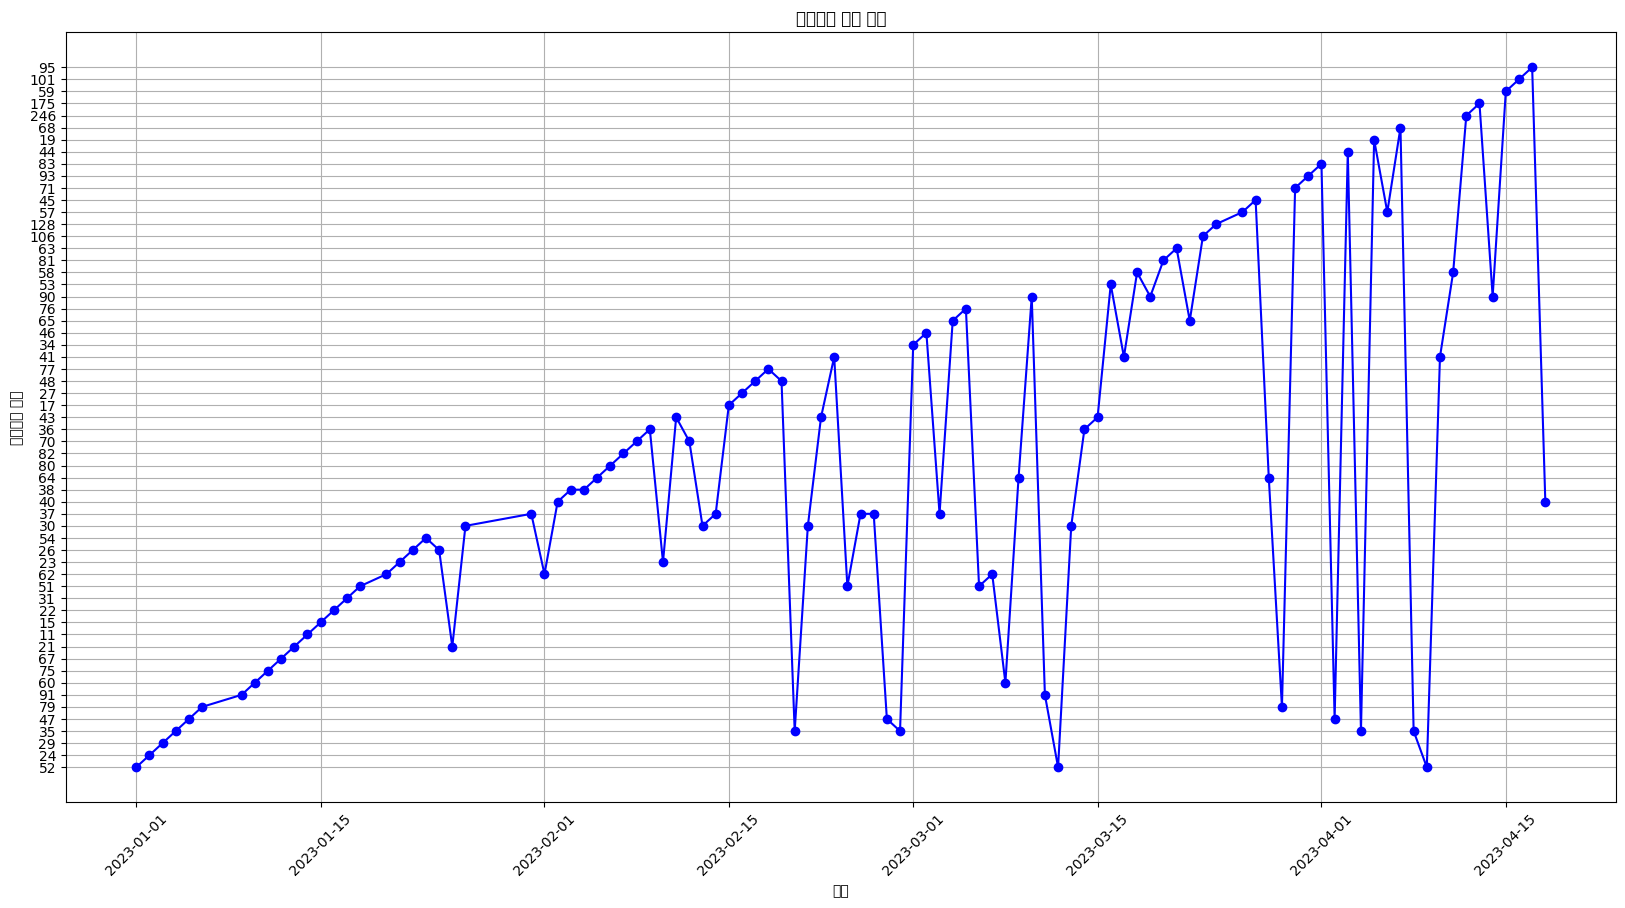

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


# 필요한 열 선택
df = df[['msurDt', 'pm10Value']]

# 날짜를 인덱스로 설정
df['msurDt'] = pd.to_datetime(df['msurDt'])
df.set_index('msurDt', inplace=True)

# 그래프 생성
plt.figure(figsize=(20, 10))
plt.plot(df.index, df['pm10Value'], marker='o', linestyle='-', color='b')
plt.xlabel('날짜')
plt.ylabel('미세먼지 농도')
plt.title('미세먼지 농도 추이')
plt.xticks(rotation=45)
plt.grid(True)

# 그래프 출력
plt.show()

###초미세먼지 농도

<ipython-input-7-970e39e78087>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['msurDt'] = pd.to_datetime(df['msurDt'])
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabt

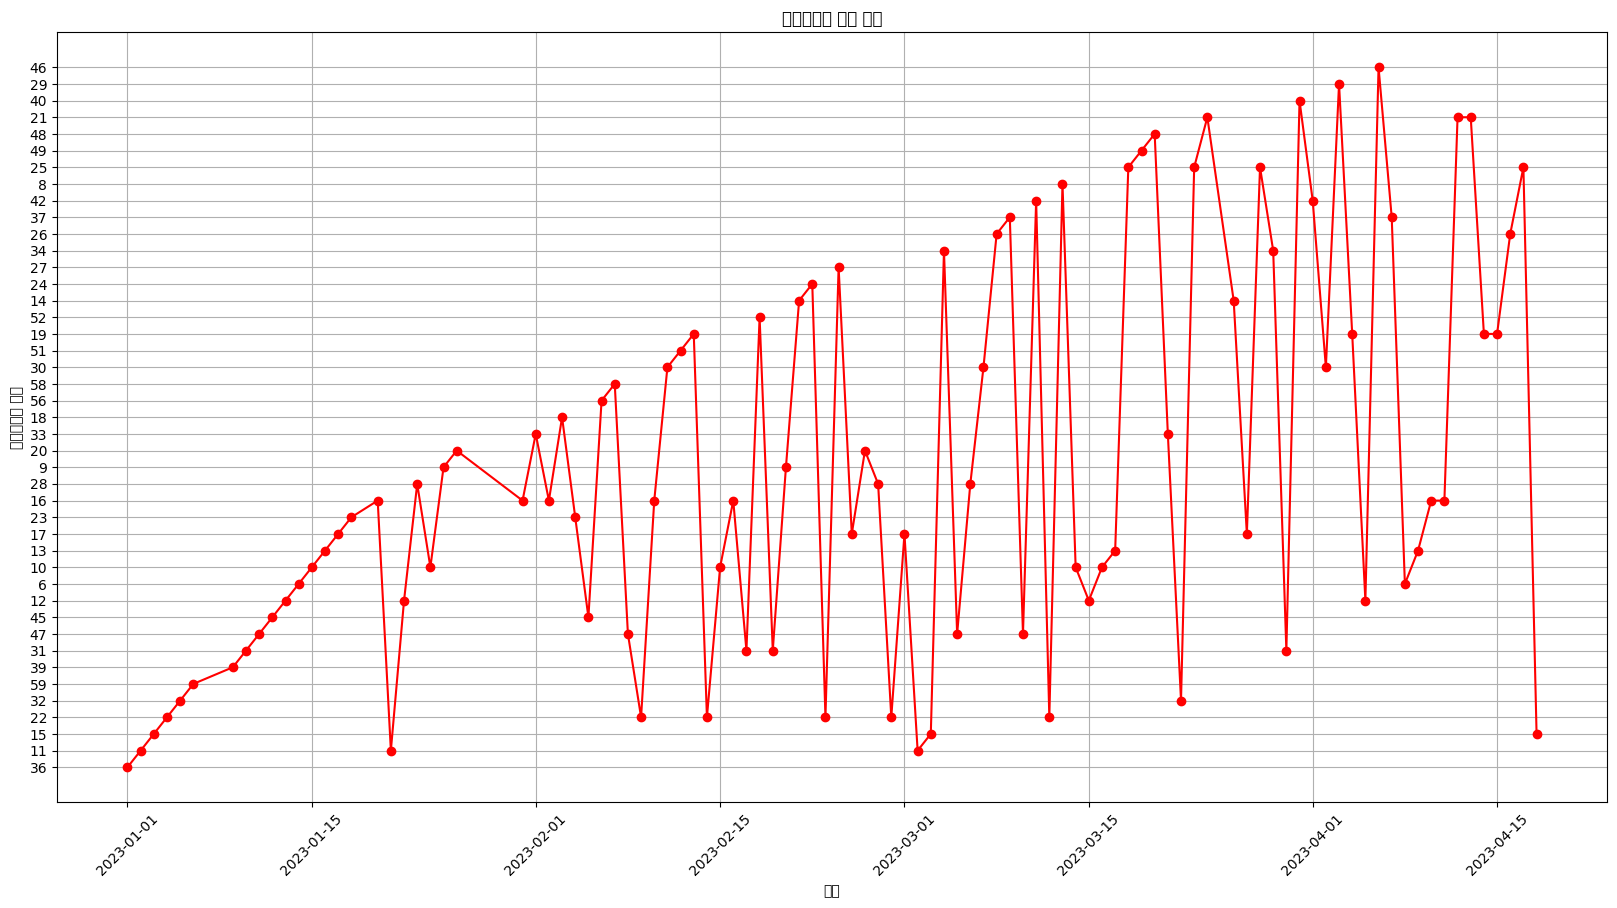

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# 필요한 열 선택
df = df[['msurDt', 'pm25Value']]

# 날짜를 인덱스로 설정
df['msurDt'] = pd.to_datetime(df['msurDt'])
df.set_index('msurDt', inplace=True)

# 그래프 생성
plt.figure(figsize=(20, 10))
plt.plot(df.index, df['pm25Value'], marker='o', linestyle='-', color='r')
plt.xlabel('날짜')
plt.ylabel('초미세먼지 농도')
plt.title('초미세먼지 농도 추이')
plt.xticks(rotation=45)
plt.grid(True)

# 그래프 출력
plt.show()

<ipython-input-9-5ba81944c7de>:32: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  plt.tight_layout()
<ipython-input-9-5ba81944c7de>:32: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  plt.tight_layout()
<ipython-input-9-5ba81944c7de>:32: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  plt.tight_layout()
<ipython-input-9-5ba81944c7de>:32: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout()
<ipython-input-9-5ba81944c7de>:32: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from current font.
  plt.tight_layout()
<ipython-input-9-5ba81944c7de>:32: UserWarning: Glyph 50684 (\N{HANGUL SYLLABLE YEOM}) missing from current font.
  plt.tight_layout()
<ipython-input-9-5ba81944c7de>:32: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
<ipython-input-9-5ba81944c7de>:32: UserWarning: Glyph 51456 (\N{H

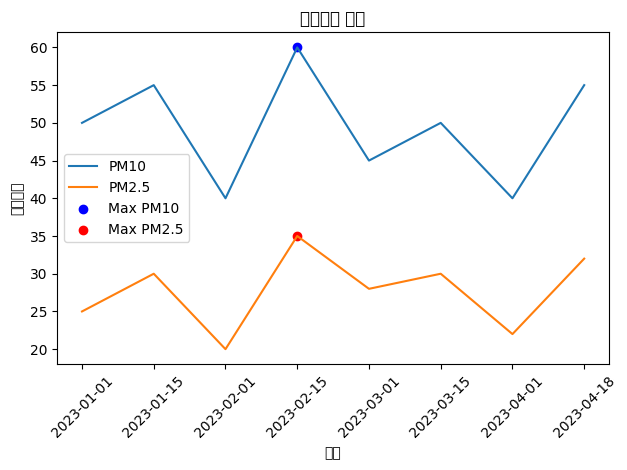

In [9]:
import matplotlib.pyplot as plt

# 임의로 생성된 데이터
dates = ['2023-01-01', '2023-01-15', '2023-02-01', '2023-02-15', '2023-03-01', '2023-03-15', '2023-04-01', '2023-04-18']
pm10_values = [50, 55, 40, 60, 45, 50, 40, 55]  # 미세먼지 데이터
pm25_values = [25, 30, 20, 35, 28, 30, 22, 32]  # 초미세먼지 데이터

# 가장 심한 미세먼지 및 초미세먼지 농도를 가지는 인덱스 찾기
max_pm10_index = pm10_values.index(max(pm10_values))
max_pm25_index = pm25_values.index(max(pm25_values))

# 그래프 생성
plt.plot(dates, pm10_values, label='PM10')
plt.plot(dates, pm25_values, label='PM2.5')

# 가장 심한 미세먼지 및 초미세먼지 농도를 강조하는 부분 표시
plt.scatter(dates[max_pm10_index], pm10_values[max_pm10_index], color='blue', label='Max PM10')
plt.scatter(dates[max_pm25_index], pm25_values[max_pm25_index], color='red', label='Max PM2.5')

# 그래프 제목과 레이블 설정
plt.title('대기오염 수준')
plt.xlabel('날짜')
plt.ylabel('대기오염')

# x축 눈금 설정
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()

###한글처리

In [10]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (8,106 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122542 files and di